#          Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

we have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv files and listing the datas
df_loan = pd.read_csv(r"C:\Users\Premium\Downloads\loan_prediction.csv")
df_loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_loan.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# Obtaining the dimensions of dataset
df_loan.shape

(614, 13)

In [5]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.

Loan_iD,Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features


In [7]:
df_loan.duplicated().sum() # This check any if any duplicated entry exit in dataset

0

In [8]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Check null values
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_loan.isnull().sum().sum()

149

There are Nan values present in the dataset.

with the missing data  we use mean amd mode to replace with NaN values.

# Filling the missing Values

In [12]:
# Filling Missing value with mode for categorical features
df_loan['Gender'].fillna(df_loan['Gender'].mode()[0],inplace=True)
df_loan['Married'].fillna(df_loan['Married'].mode()[0],inplace=True)
df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0],inplace=True)
df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0],inplace=True)
df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0], inplace=True)


# Filling for Numerical features
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0],inplace=True)
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median(), inplace=True)

In [13]:
df_loan.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y
385,LP002237,Male,No,1,Graduate,No,3667,0.0,113.0,180.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
542,LP002753,Female,No,1,Graduate,No,3652,0.0,95.0,360.0,1.0,Semiurban,Y
309,LP001998,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y
545,LP002767,Male,Yes,0,Graduate,No,2768,1950.0,155.0,360.0,1.0,Rural,Y
169,LP001580,Male,Yes,2,Graduate,No,8000,0.0,200.0,360.0,1.0,Semiurban,Y


In [14]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 No Missing Value are Present now and we can go ahead with further analysis.

<AxesSubplot:>

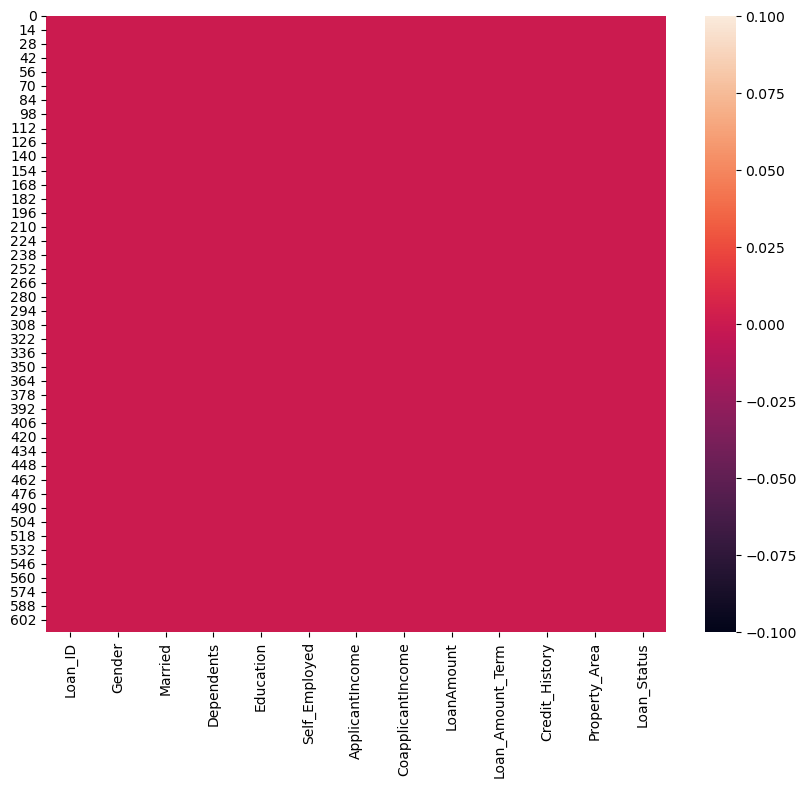

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_loan.isnull())

# Exploratory Data Analysis

In [17]:
# Counting the occurance of each value in Gender column
df_loan['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

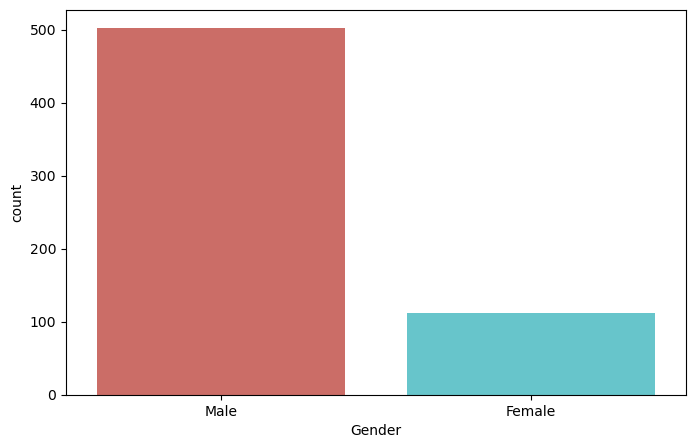

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Gender', data= df_loan, palette = 'hls' )
plt.show()

In [19]:
# Counting the occurance of each value in Dependent column
df_loan['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

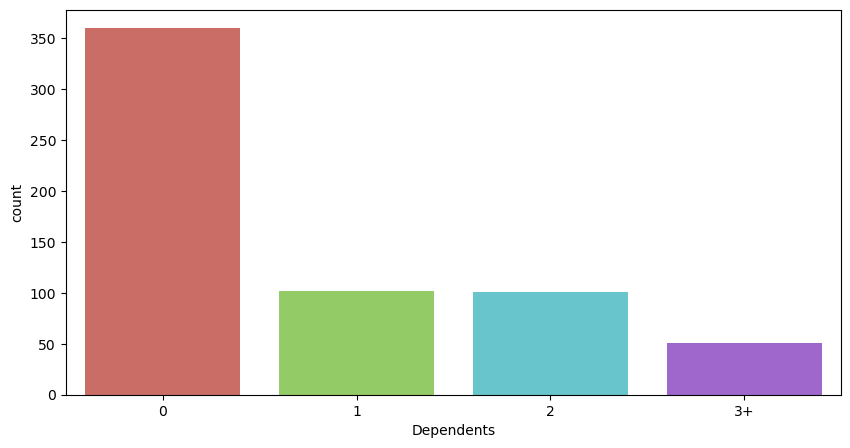

In [24]:
plt.figure(figsize=(10,5))
sns.countplot('Dependents', data = df_loan, palette='hls')
plt.show()

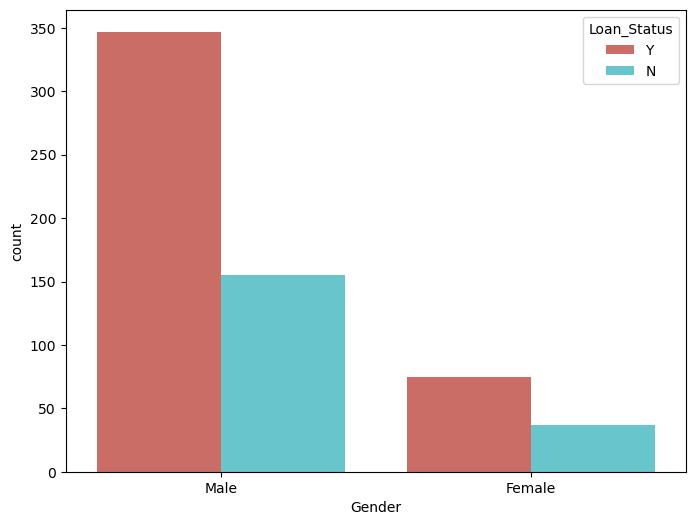

In [26]:
# comparing loan status with gender column
plt.figure(figsize=(8,6))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=df_loan , palette='hls')
plt.show()

More males are on loan than females

<AxesSubplot:xlabel='Married', ylabel='count'>

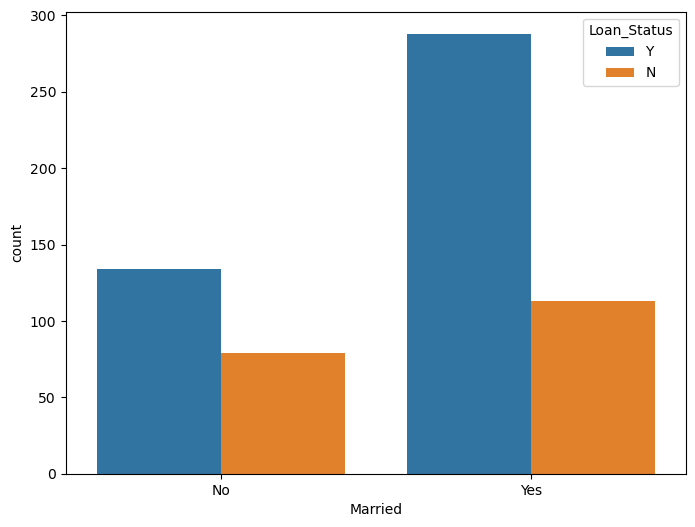

In [27]:
# comparing loan status with married column
plt.figure(figsize = (8,6))
sns.countplot( x='Married', hue ='Loan_Status', data = df_loan)

In [28]:
#Counting the occurence of each value with Loan_amount_term column
df_loan['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

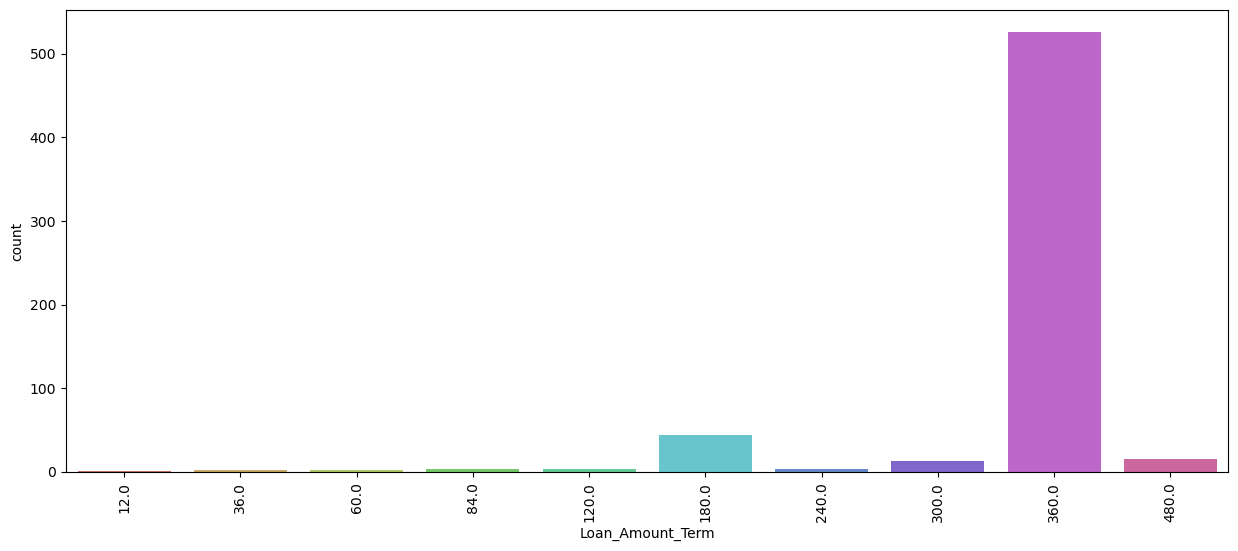

In [29]:
plt.figure(figsize=(15,6))
sns.countplot('Loan_Amount_Term', data =df_loan, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [30]:
df_loan['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

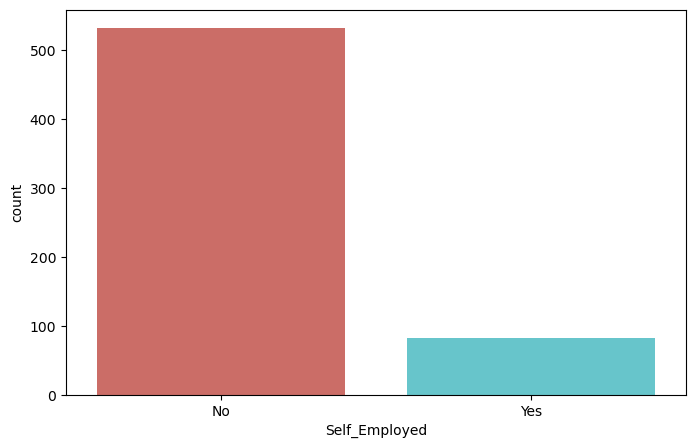

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Self_Employed', data = df_loan, palette='hls')
plt.show()

The category of those that take loans is less of self-employed people. That those who are not self-employed probably salary earners obtain more loan.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

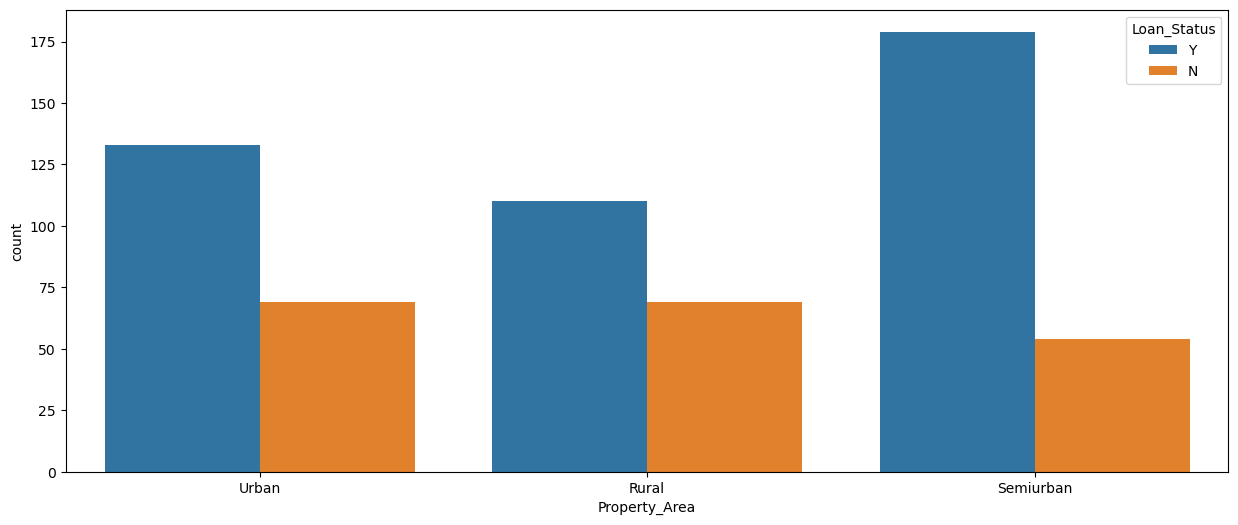

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data = df_loan)

Semiurban obtain more loan, folowed by Urban and then rural.

# Exploring Target Variable

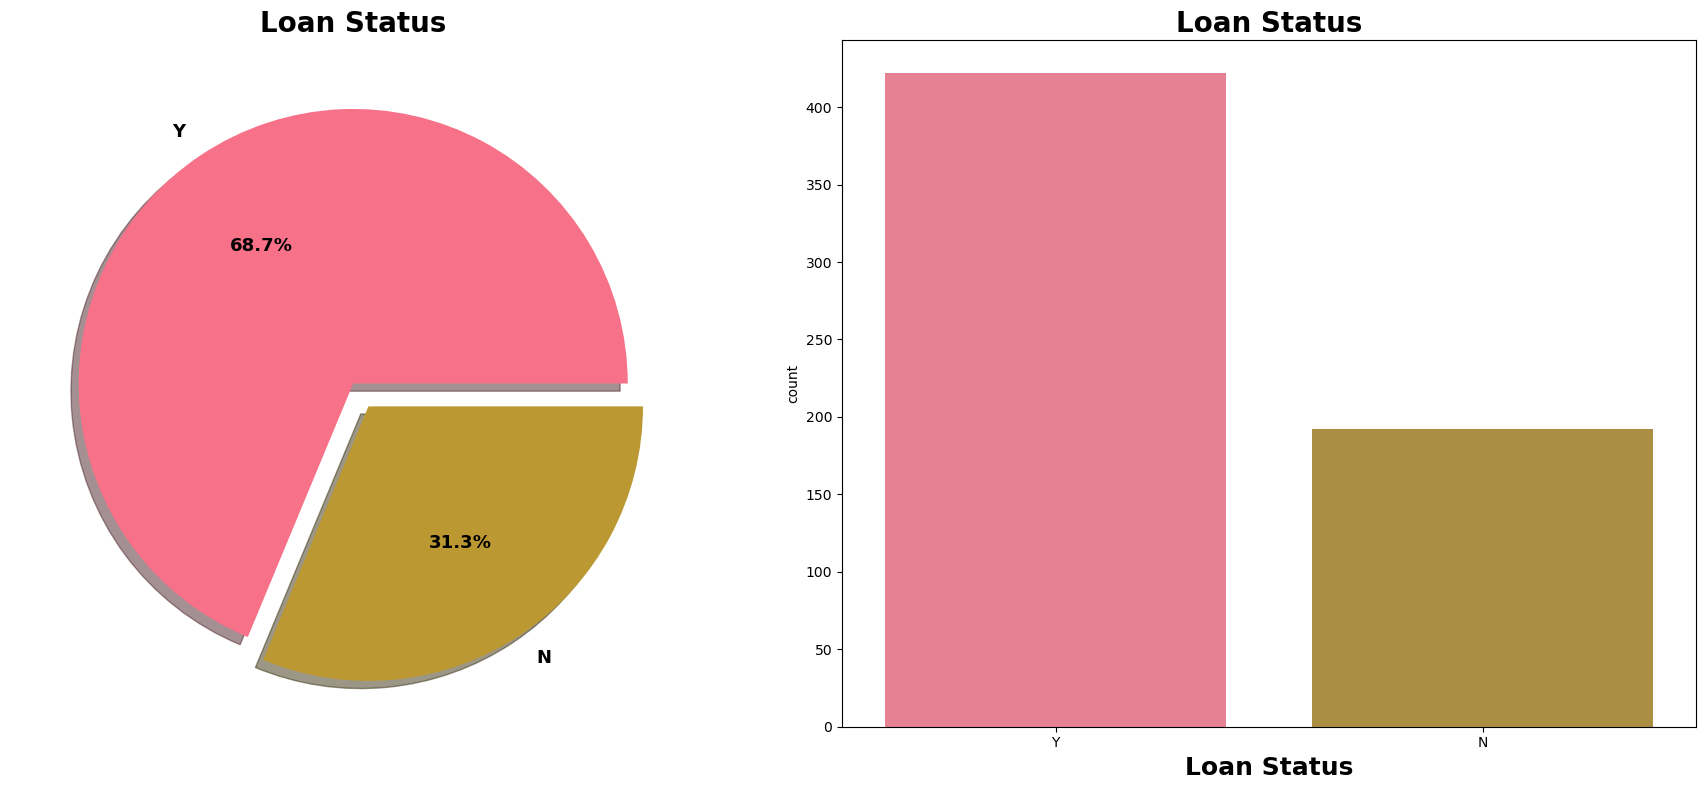

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df_loan['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df_loan,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

 Almost 68.7% Applicants gets loan Approval.

# Checking for Outliers

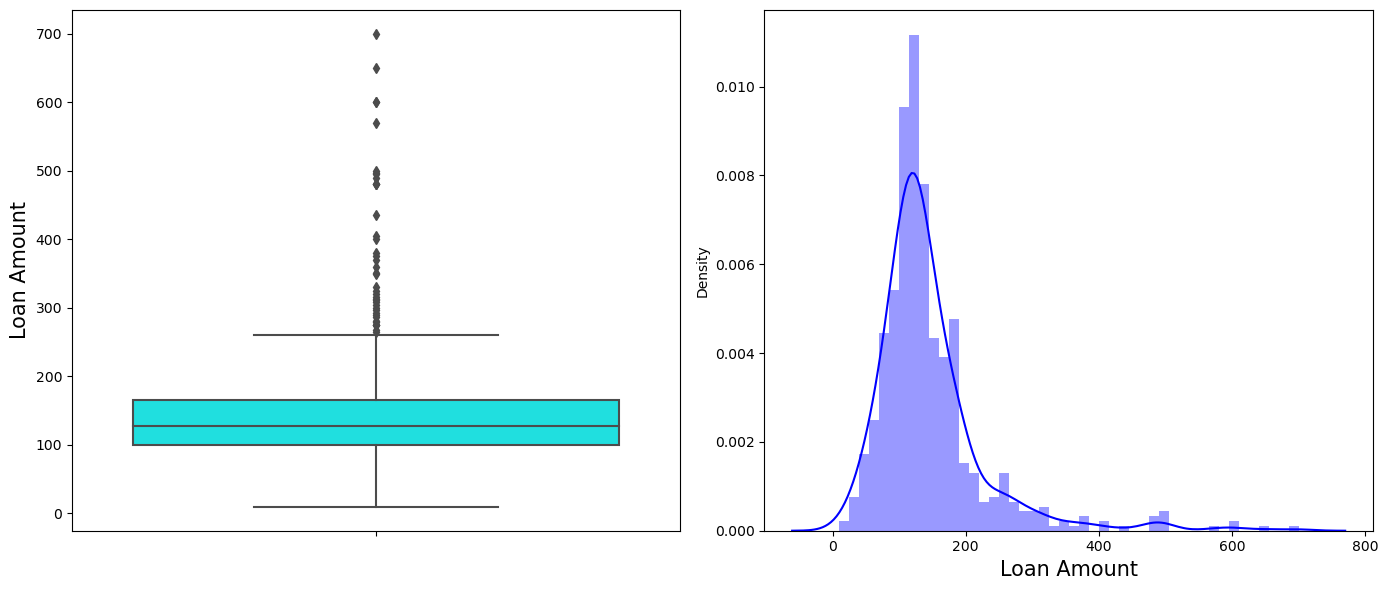

In [34]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df_loan,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df_loan['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

Clearly we can see outliers in boxplot .

# Statistical Matrix

<AxesSubplot:>

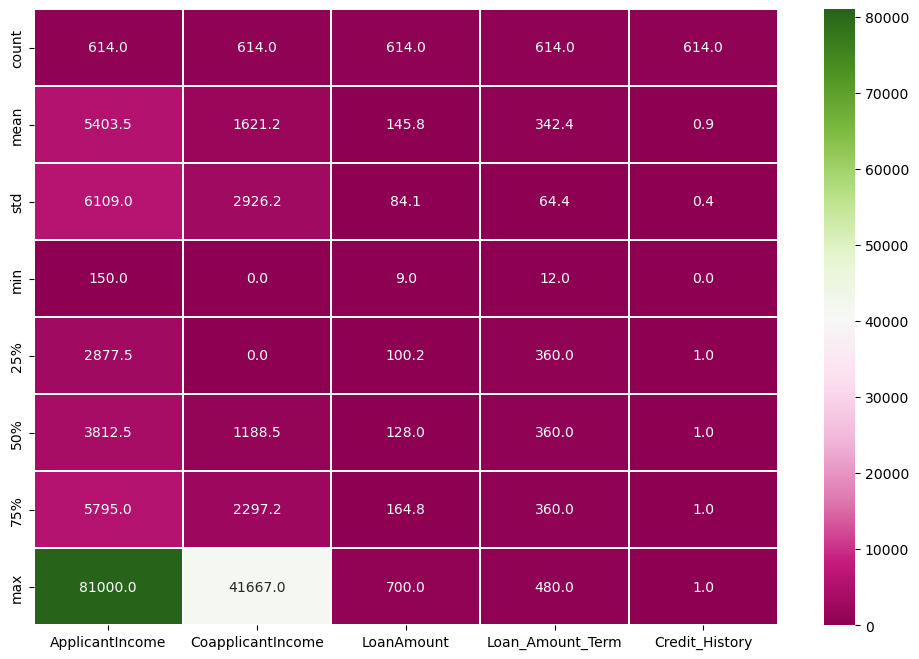

In [35]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df_loan.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [36]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Minimum Applicant income is 150 and maximum is 81000.

In Applicant Income & Coapplicant Income Std deviation value is greater than median.

Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.

# Correlation

<AxesSubplot:>

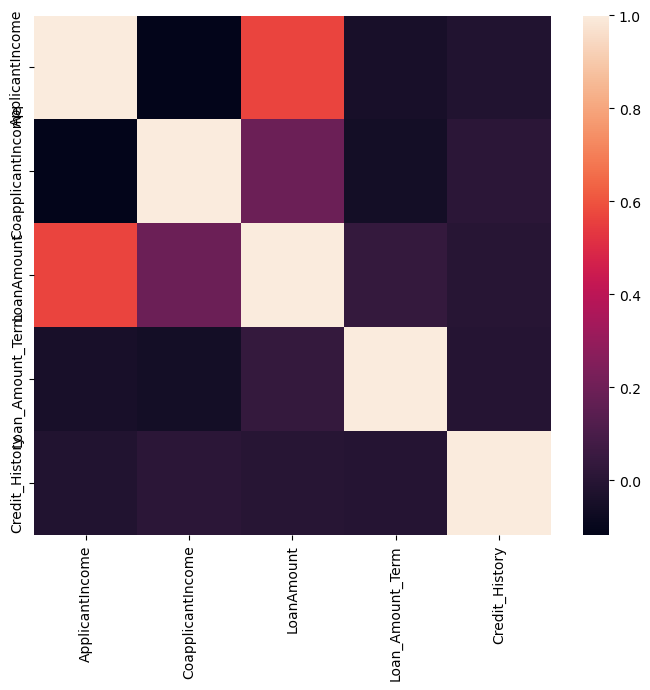

In [38]:
# Showing correlation through heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df_loan.corr())

# Encoding categorical data

In [39]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [40]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df_loan[i] = le.fit_transform(df_loan[i])
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [41]:
# Droping unnecessary columns
df_loan.drop(["Loan_ID"], axis=1, inplace=True)

# Skewness 

In [45]:
Num =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

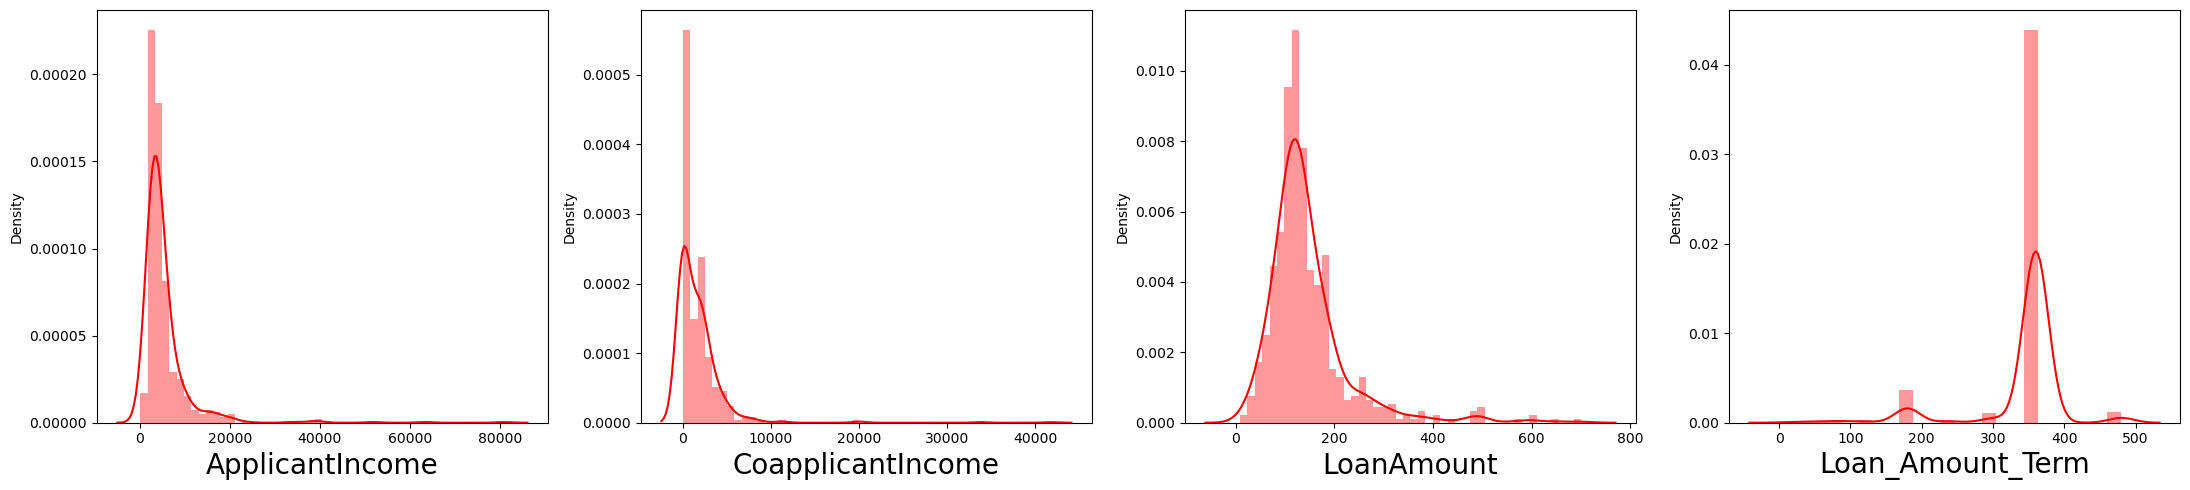

In [46]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Num:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df_loan[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [47]:
df_loan.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Machine Learning Model Building and Prediction

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [62]:
X = df_loan[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
Y = df_loan.Loan_Status

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (429, 5)
Training target vector size: (429,)
Test feature matrix size: (185, 5)
Test target vector size: (185,)


In [67]:
df_loan.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8054054054054054


Confusion matrix of Logistics Regression : 
 [[ 20  31]
 [  5 129]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.80      0.39      0.53        51
           1       0.81      0.96      0.88       134

    accuracy                           0.81       185
   macro avg       0.80      0.68      0.70       185
weighted avg       0.80      0.81      0.78       185



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8


Confusion matrix : 
 [[ 20  31]
 [  6 128]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.39      0.52        51
           1       0.81      0.96      0.87       134

    accuracy                           0.80       185
   macro avg       0.79      0.67      0.70       185
weighted avg       0.80      0.80      0.78       185





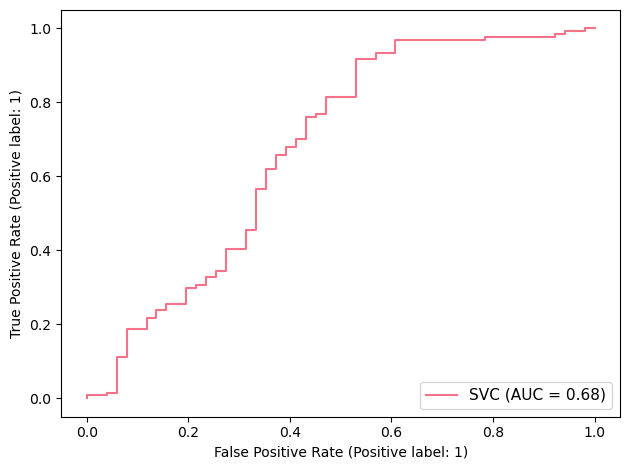

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8108108108108109


Confusion matrix : 
 [[ 20  31]
 [  4 130]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.39      0.53        51
           1       0.81      0.97      0.88       134

    accuracy                           0.81       185
   macro avg       0.82      0.68      0.71       185
weighted avg       0.81      0.81      0.79       185





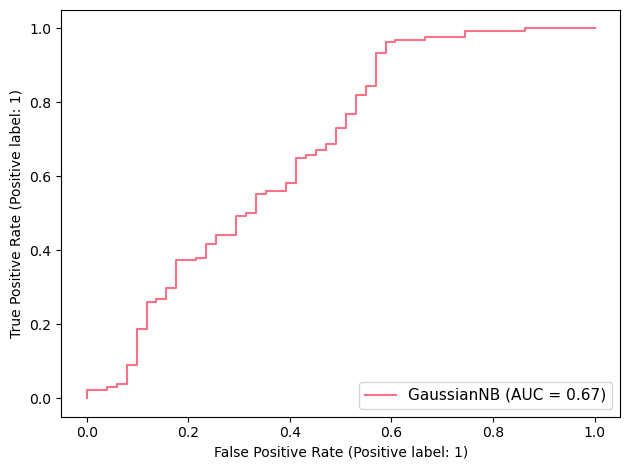

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.6432432432432432


Confusion matrix : 
 [[29 22]
 [44 90]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.40      0.57      0.47        51
           1       0.80      0.67      0.73       134

    accuracy                           0.64       185
   macro avg       0.60      0.62      0.60       185
weighted avg       0.69      0.64      0.66       185





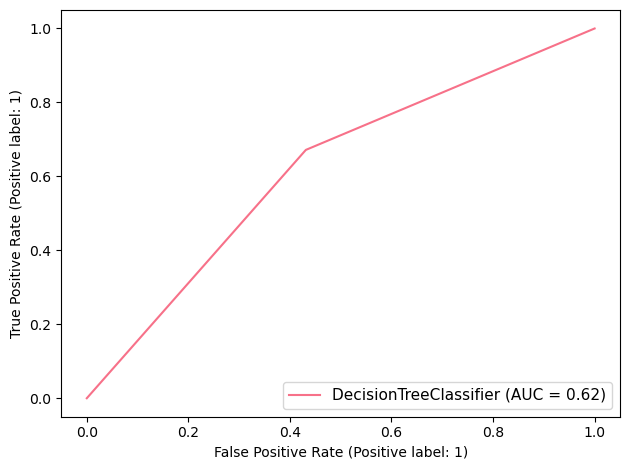

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7243243243243244


Confusion matrix : 
 [[ 24  27]
 [ 24 110]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.47      0.48        51
           1       0.80      0.82      0.81       134

    accuracy                           0.72       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.72      0.72      0.72       185





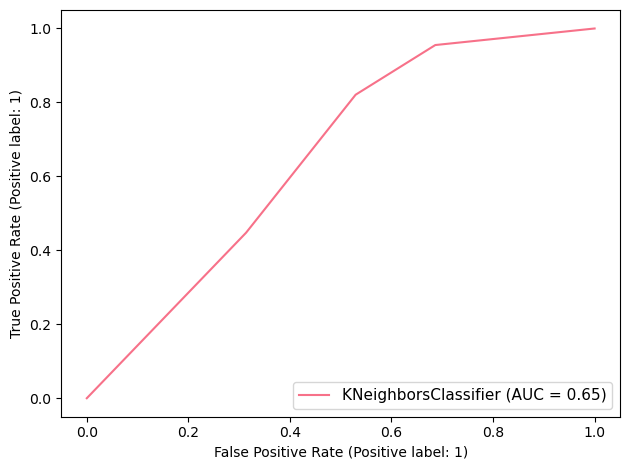

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.7243243243243244


Confusion matrix : 
 [[ 24  27]
 [ 24 110]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.47      0.48        51
           1       0.80      0.82      0.81       134

    accuracy                           0.72       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.72      0.72      0.72       185





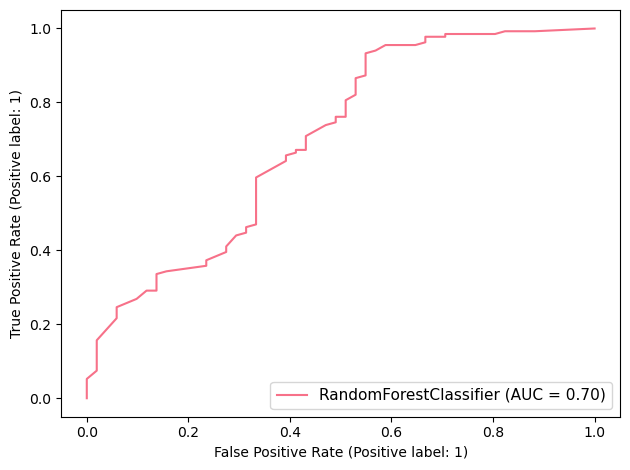

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7405405405405405


Confusion matrix : 
 [[ 24  27]
 [ 21 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.47      0.50        51
           1       0.81      0.84      0.82       134

    accuracy                           0.74       185
   macro avg       0.67      0.66      0.66       185
weighted avg       0.73      0.74      0.74       185





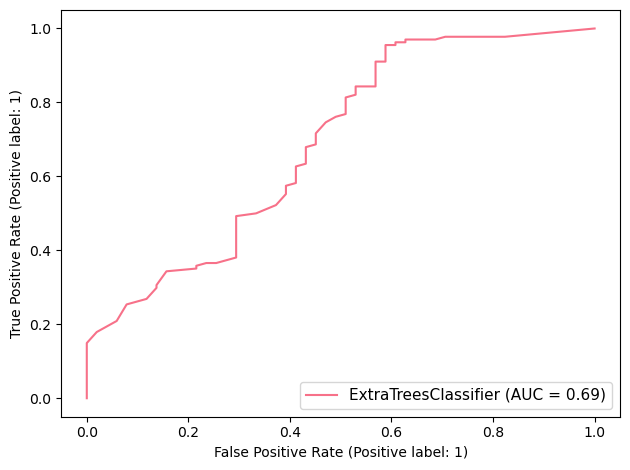

In [69]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')

# CrossValidation

In [70]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('=============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
Mean Score : 0.8078368652538984
Std deviation : 0.02923416378093254




Cross Validation Score SVC() :

Score : [0.81300813 0.7804878  0.7804878  0.83739837 0.81147541]
Mean Score : 0.8045715047314408
Std deviation : 0.021709413143388503




Cross Validation Score GaussianNB() :

Score : [0.81300813 0.75609756 0.77235772 0.84552846 0.79508197]
Mean Score : 0.7964147674263627
Std deviation : 0.03128414573035331




Cross Validation Score DecisionTreeClassifier() :

Score : [0.67479675 0.67479675 0.64227642 0.7398374  0.77868852]
Mean Score : 0.702079168332667
Std deviation : 0.04971862166538839




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.7398374  0.7398374  0.72357724 0.76422764 0.7704918 ]
Mean Score : 0.7475942956150872
Std deviation : 0.01730966291681133




Cross Validation Score RandomForestClassifier() :

Score : [0.75609756 0.71544715 

 Here Logistic Regression() and Random Forest regression() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on this and Use it as final model.

# Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [74]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.791 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.767 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.779 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.767 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [75]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 50}

# Final Model

In [76]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7405405405405405


# Save model

In [77]:
import joblib
joblib.dump(Final_mod,'LoanPred.pkl')

['LoanPred.pkl']